In [9]:
### Hàng đợi M/M/c: Lý thuyết, Mô phông, và Bài giải

# 1. Lý thuyết M/M/c
"""
M/M/c là mô hình hàng đợi:
- Arrival: theo tiến trình Poisson, tỷ lệ đến là lambda 
- Service: thời gian phục vụ có phân phối một chiều (exponential) với tỷ lệ mu
- c là số máy phục vụ song song.

Các đại lượng quan trọng:
- P0: Xác suất hệ thống rỗng
- L: Số khách trung bình trong hệ thống
- Lq: Số khách trung bình trong hàng đợi
- W: Thời gian trung bình trong hệ thống
- Wq: Thời gian trung bình chờ phục vụ

Thuật ngữ:
-  \rho = \frac{lambda}{c \u03bc}  là độ trễ

"""



'\nM/M/c là mô hình hàng đợi:\n- Arrival: theo tiến trình Poisson, tỷ lệ đến là lambda \n- Service: thời gian phục vụ có phân phối một chiều (exponential) với tỷ lệ mu\n- c là số máy phục vụ song song.\n\nCác đại lượng quan trọng:\n- P0: Xác suất hệ thống rỗng\n- L: Số khách trung bình trong hệ thống\n- Lq: Số khách trung bình trong hàng đợi\n- W: Thời gian trung bình trong hệ thống\n- Wq: Thời gian trung bình chờ phục vụ\n\nThuật ngữ:\n-  \rho = \x0crac{lambda}{c μ}  là độ trễ\n\n'

In [11]:
import numpy as np
import simpy
import matplotlib.pyplot as plt

# 2. Các công thức lý thuyết
from math import factorial

def calc_P0(lam, mu, c):
    rho = lam / (c * mu)
    sum_terms = sum([(lam/mu)**n / factorial(n) for n in range(c)])
    last_term = (lam/mu)**c / (factorial(c) * (1 - rho))
    P0 = 1 / (sum_terms + last_term)
    return P0

def calc_Lq(lam, mu, c):
    rho = lam / (c * mu)
    P0 = calc_P0(lam, mu, c)
    Lq = (P0 * (lam/mu)**c * rho) / (factorial(c) * (1 - rho)**2)
    return Lq

def calc_L(lam, mu, c):
    Lq = calc_Lq(lam, mu, c)
    L = Lq + lam/mu
    return L

def calc_W(lam, mu, c):
    L = calc_L(lam, mu, c)
    W = L / lam
    return W

def calc_Wq(lam, mu, c):
    Lq = calc_Lq(lam, mu, c)
    Wq = Lq / lam
    return Wq



In [12]:
# 3. Mô phông M/M/c

def mmc_simulation(lam, mu, c, sim_time=1000):
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=c)
    
    wait_times = []

    def customer(name, env, server):
        arrival_time = env.now
        with server.request() as request:
            yield request
            wait = env.now - arrival_time
            wait_times.append(wait)
            service_time = np.random.exponential(1/mu)
            yield env.timeout(service_time)

    def source(env, lam, server):
        i = 0
        while True:
            yield env.timeout(np.random.exponential(1/lam))
            env.process(customer(f'Customer {i}', env, server))
            i += 1

    env.process(source(env, lam, server))
    env.run(until=sim_time)
    
    return wait_times



In [13]:
# 4. Ví dụ: Thực hiện tính toán và mô phông

# Giá trị mặc định
lam = 5  # arrival rate
mu = 3   # service rate per server
c = 3    # number of servers

# Tính toán lý thuyết
P0 = calc_P0(lam, mu, c)
Lq = calc_Lq(lam, mu, c)
L = calc_L(lam, mu, c)
Wq = calc_Wq(lam, mu, c)
W = calc_W(lam, mu, c)



In [14]:
print(f"P0 (hệ thống rỗng) = {P0:.4f}")
print(f"Lq (số khách trong hàng đợi) = {Lq:.4f}")
print(f"L (tổng số khách) = {L:.4f}")
print(f"Wq (thời gian chờ trung bình) = {Wq:.4f}")
print(f"W (thời gian trung bình hệ thống) = {W:.4f}")



P0 (hệ thống rỗng) = 0.1727
Lq (số khách trong hàng đợi) = 0.3747
L (tổng số khách) = 2.0414
Wq (thời gian chờ trung bình) = 0.0749
W (thời gian trung bình hệ thống) = 0.4083


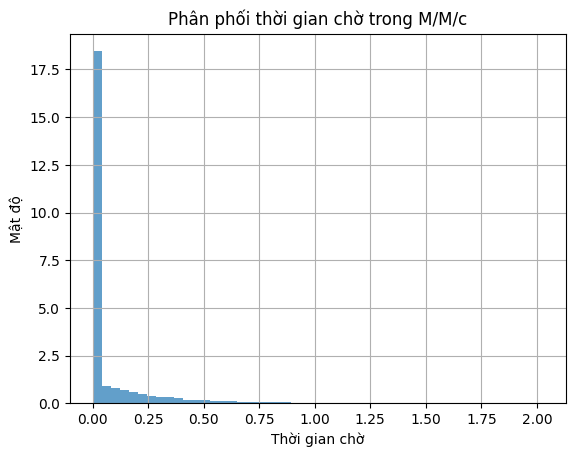

In [15]:
# Mô phông
wait_times = mmc_simulation(lam, mu, c, sim_time=10000)

# Vẽ biểu đồ
plt.hist(wait_times, bins=50, density=True, alpha=0.7)
plt.title("Phân phối thời gian chờ trong M/M/c")
plt.xlabel("Thời gian chờ")
plt.ylabel("Mật độ")
plt.grid()
plt.show()



In [19]:
# 5. Bài tập tự luận
"""
Bài tập:
Một trung tâm dịch vụ có 4 nhân viên (c=4), khách đến theo tiến trình Poisson với đỉnh tần suất 10 khách/giờ (lambda =10).
Thời gian phục vụ trung bình là 15 phút (tức là mu =4  khách/giờ).

Tính:
1. Xác suất hệ thống rỗng (P0)
2. Số khách trung bình trong hệ thống (L)
3. Thời gian chờ trung bình (Wq)

Giải:
- lambda =10 , mu =4, c=4
-  \rho = \frac{lambda}{c mu} = \frac{10}{16} = 0.625 

Tính  P_0 ,  L_q ,  L ,  W_q .

"""

'\nBài tập:\nMột trung tâm dịch vụ có 4 nhân viên (c=4), khách đến theo tiến trình Poisson với đỉnh tần suất 10 khách/giờ (lambda =10).\nThời gian phục vụ trung bình là 15 phút (tức là mu =4  khách/giờ).\n\nTính:\n1. Xác suất hệ thống rỗng (P0)\n2. Số khách trung bình trong hệ thống (L)\n3. Thời gian chờ trung bình (Wq)\n\nGiải:\n- lambda =10 , mu =4, c=4\n-  \rho = \x0crac{lambda}{c mu} = \x0crac{10}{16} = 0.625 \n\nTính  P_0 ,  L_q ,  L ,  W_q .\n\n'